In [ ]:

!pip install cuml pandas numpy matplotlib seaborn scikit-learn


link='https://developer.download.nvidia.com/compute/cuda/12.3.2/local_installers/cuda_12.3.2_546.12_windows.exe'



In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

import os
%matplotlib inline 
import pickle 

from sklearn.model_selection import GridSearchCV

      
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

from sklearn.preprocessing import MinMaxScaler, StandardScaler

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [8]:
df.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
134686,2013-09-10,Launceston,7.9,15.5,11.0,NaN,NaN,WNW,48.0,NNW,NW,20.0,26.0,66.0,51.0,997.6,996.2,NaN,NaN,11.4,14.9,Yes,No


In [9]:
df.shape

(145460, 23)

In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459    False
Length: 145460, dtype: bool

In [12]:
import pandas as pd

# Assuming 'df' is your DataFrame
duplicates = df[df.duplicated()]

# To drop duplicates and keep the first occurrence
df_no_duplicates = df.drop_duplicates()


In [13]:
df_no_duplicates

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [14]:
df_no_duplicates.shape

(145460, 23)

In [15]:
df_copy=df

In [16]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes('object').columns.tolist()

In [17]:
cat_cols

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

Skipping column 'Date' because it is not of type float64.
Skipping column 'Location' because it is not of type float64.


C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


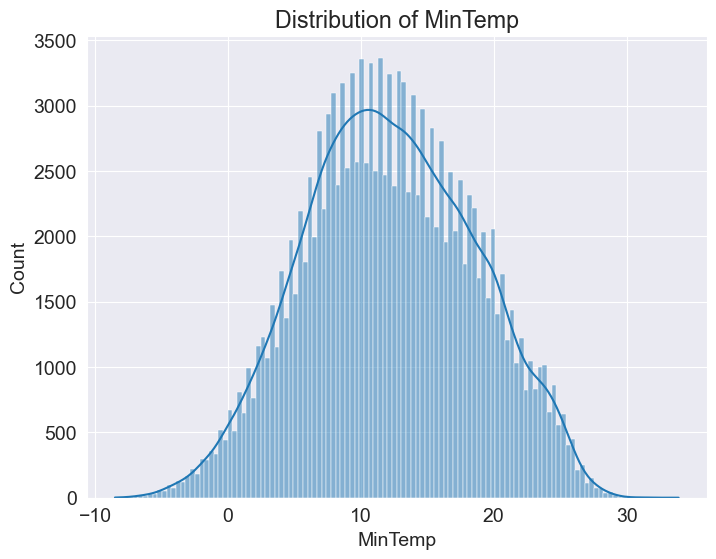

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


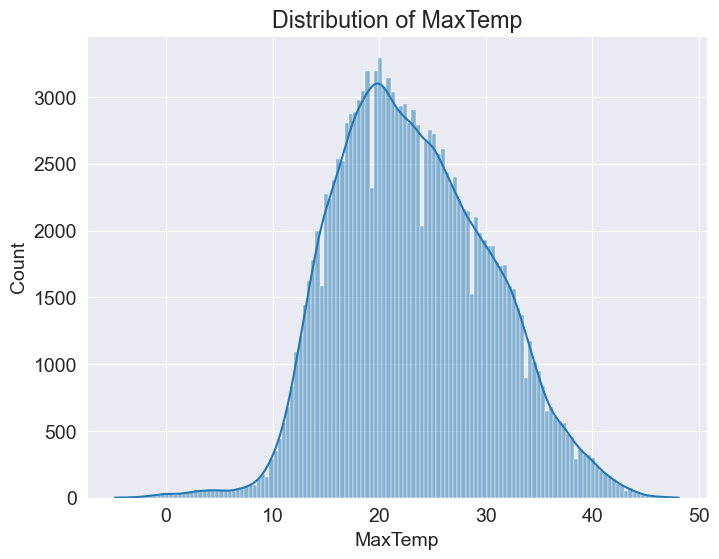

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


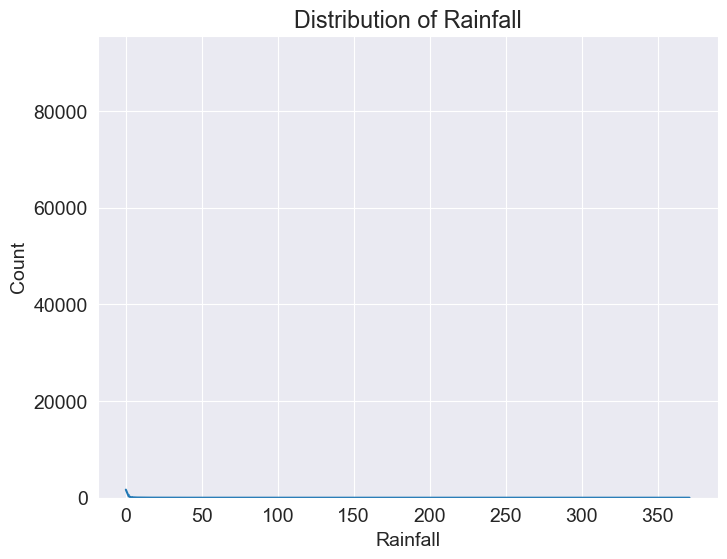

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


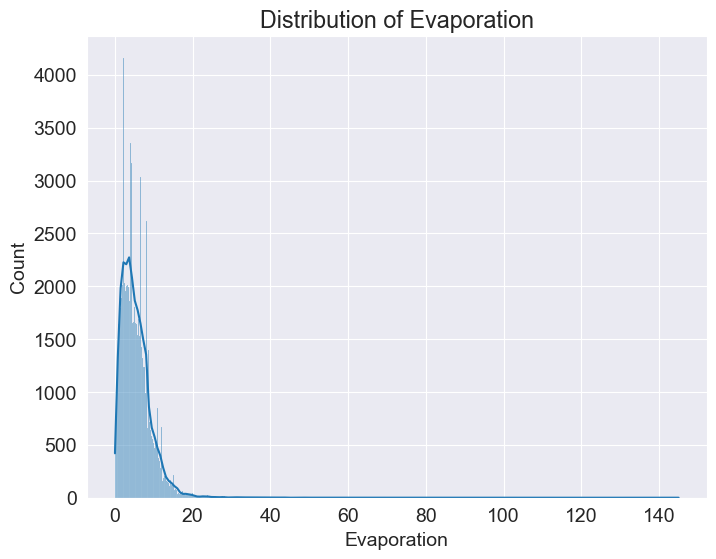

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


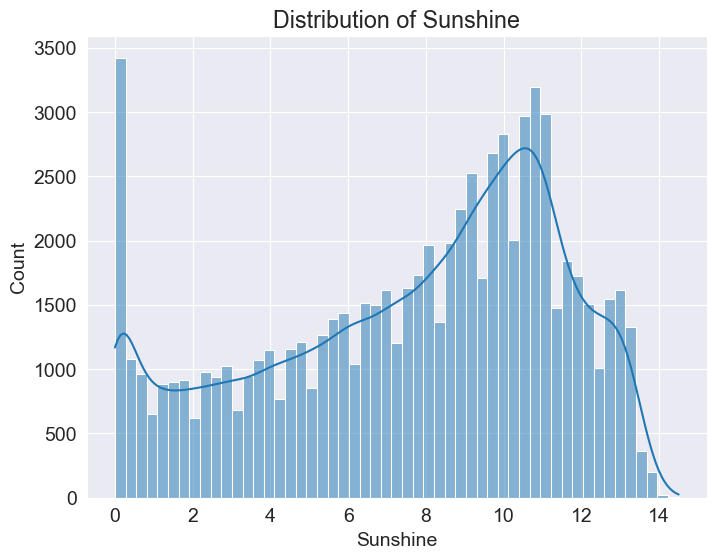

Skipping column 'WindGustDir' because it is not of type float64.


C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


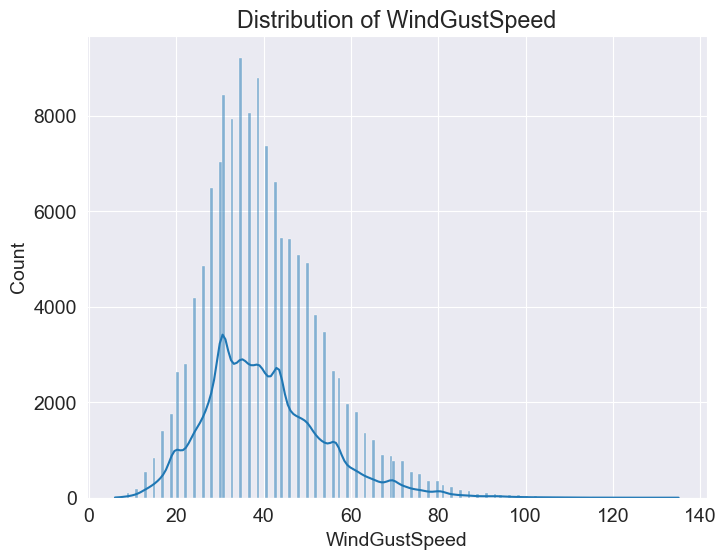

Skipping column 'WindDir9am' because it is not of type float64.
Skipping column 'WindDir3pm' because it is not of type float64.


C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


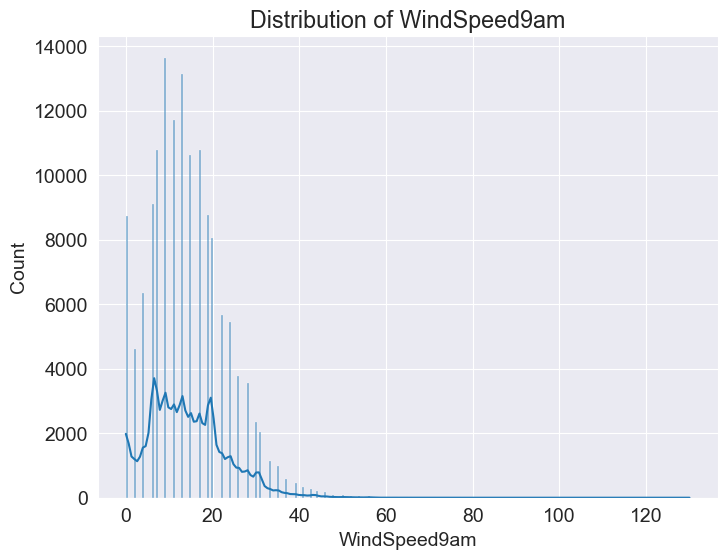

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


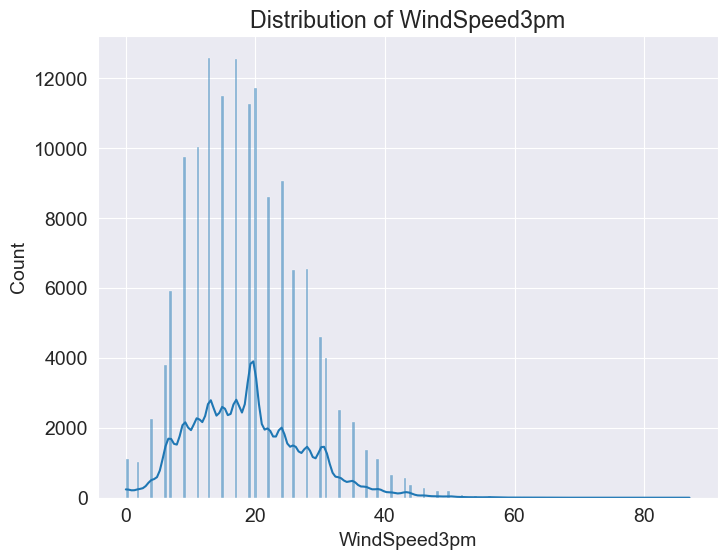

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


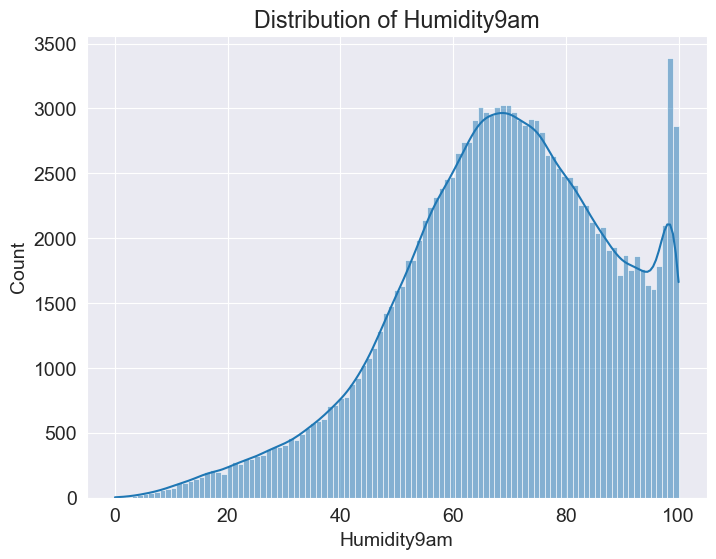

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


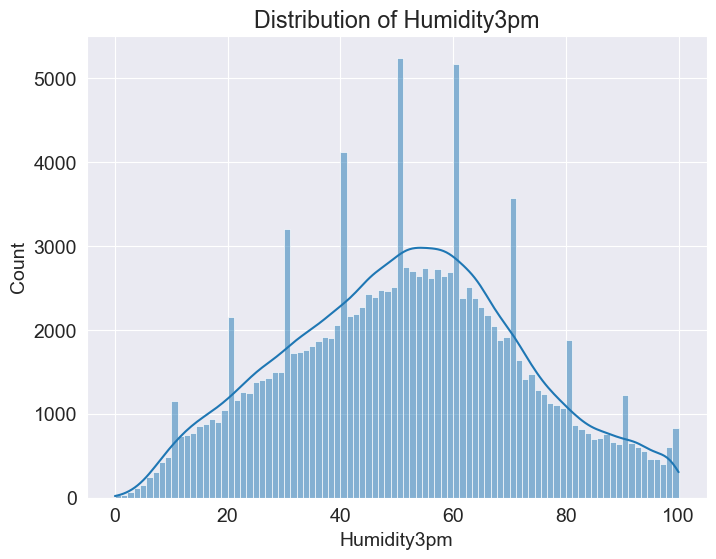

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


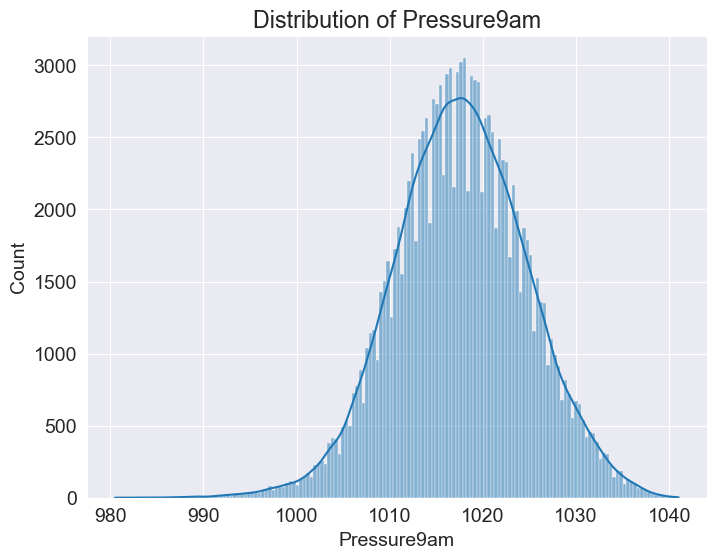

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


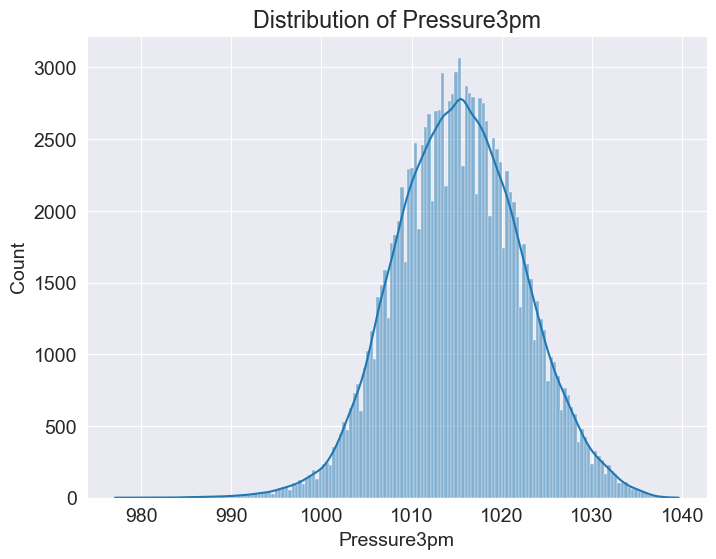

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


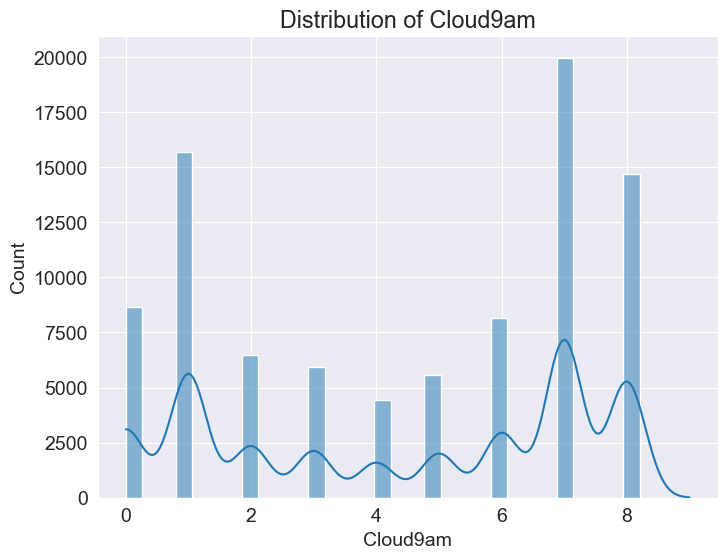

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


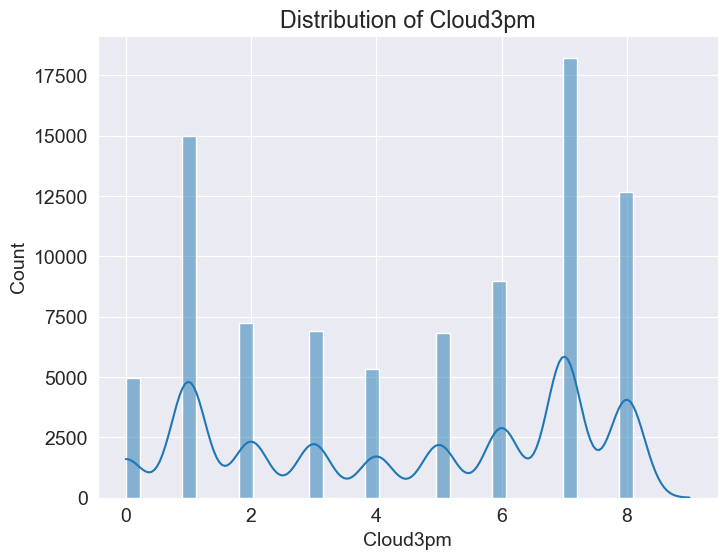

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


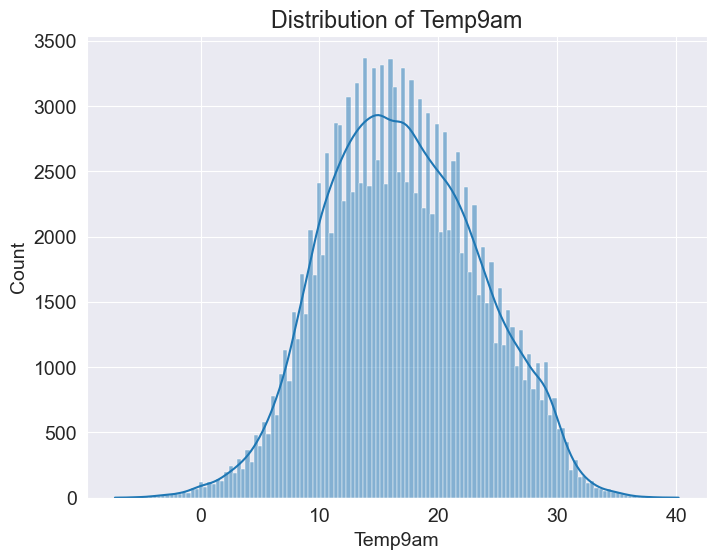

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


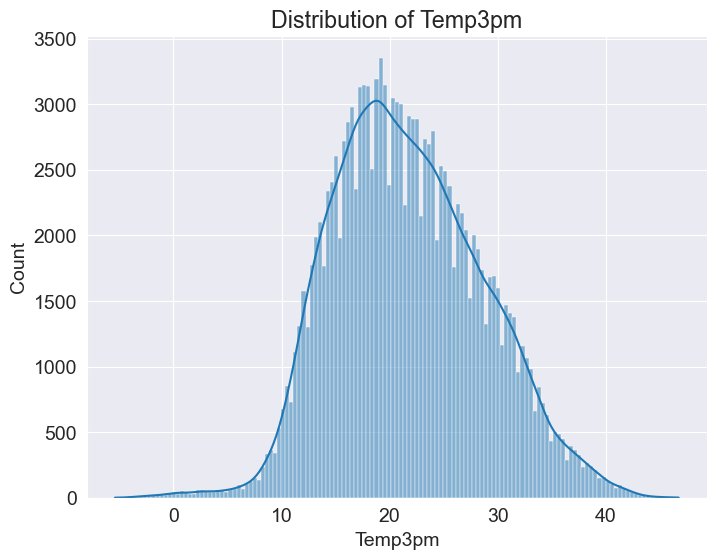

Skipping column 'RainToday' because it is not of type float64.
Skipping column 'RainTomorrow' because it is not of type float64.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df_copy.columns:
    if df_copy[column].dtype == 'float64':
        plt.figure(figsize=(8, 6))
        sns.histplot(df_copy[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()
    else:
        print(f"Skipping column '{column}' because it is not of type float64.")


In [19]:
print(numeric_columns.dtypes)


NameError: name 'numeric_columns' is not defined

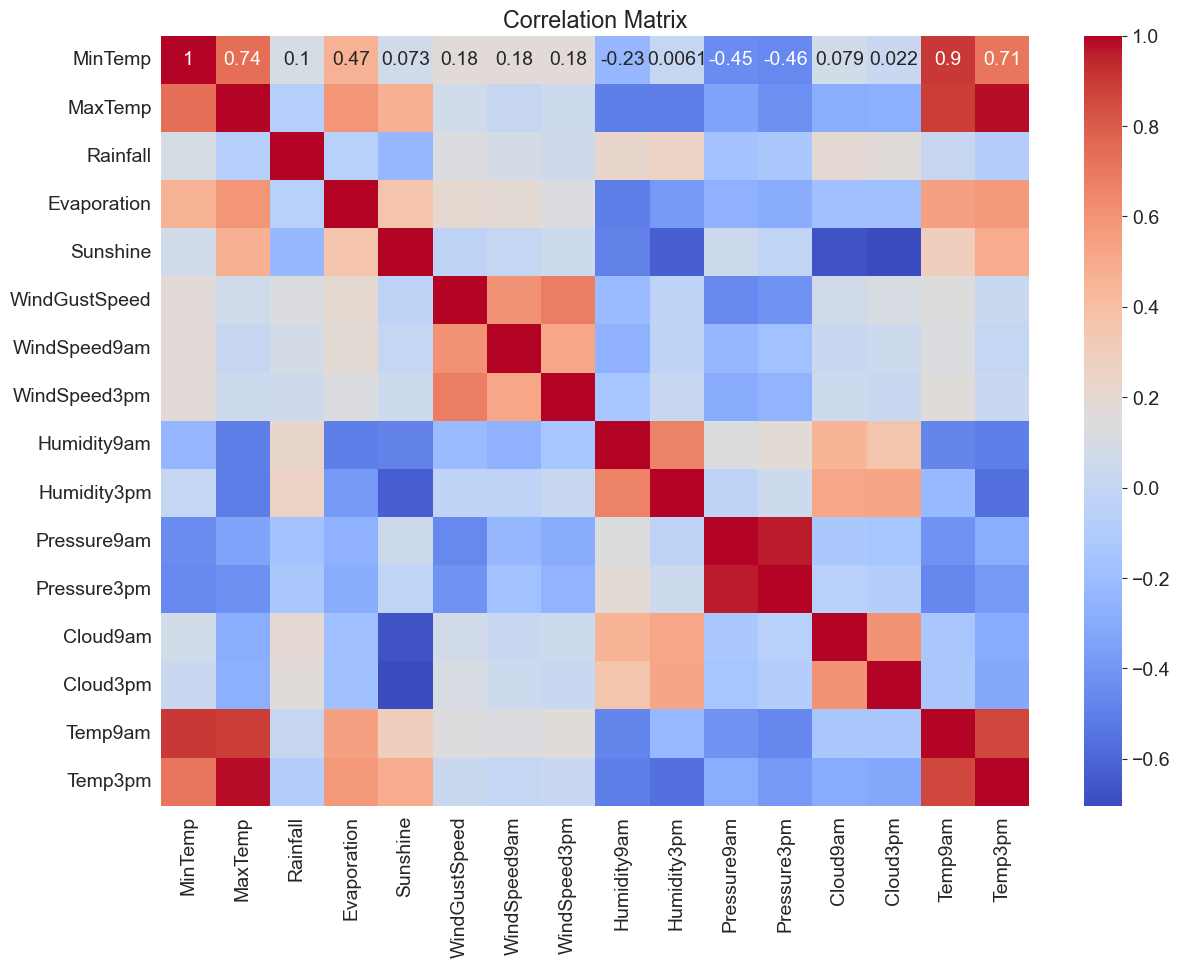

In [20]:
numeric_columns = df.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
for num_col in numeric_columns:
    for cat_col in cat_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[cat_col], y=df[num_col])
        plt.title(f'Boxplot of {num_col} by {cat_col}')
        plt.show()

NameError: name 'cat_columns' is not defined

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='MinTemp', data=df)
plt.title('Boxplot of MinTemp by Location (Part 1)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='MinTemp', data=df)
plt.title('Boxplot of MinTemp by Location (Part 2)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylim([-5, 30])  # Set y-axis limit for better comparison if needed
plt.show()

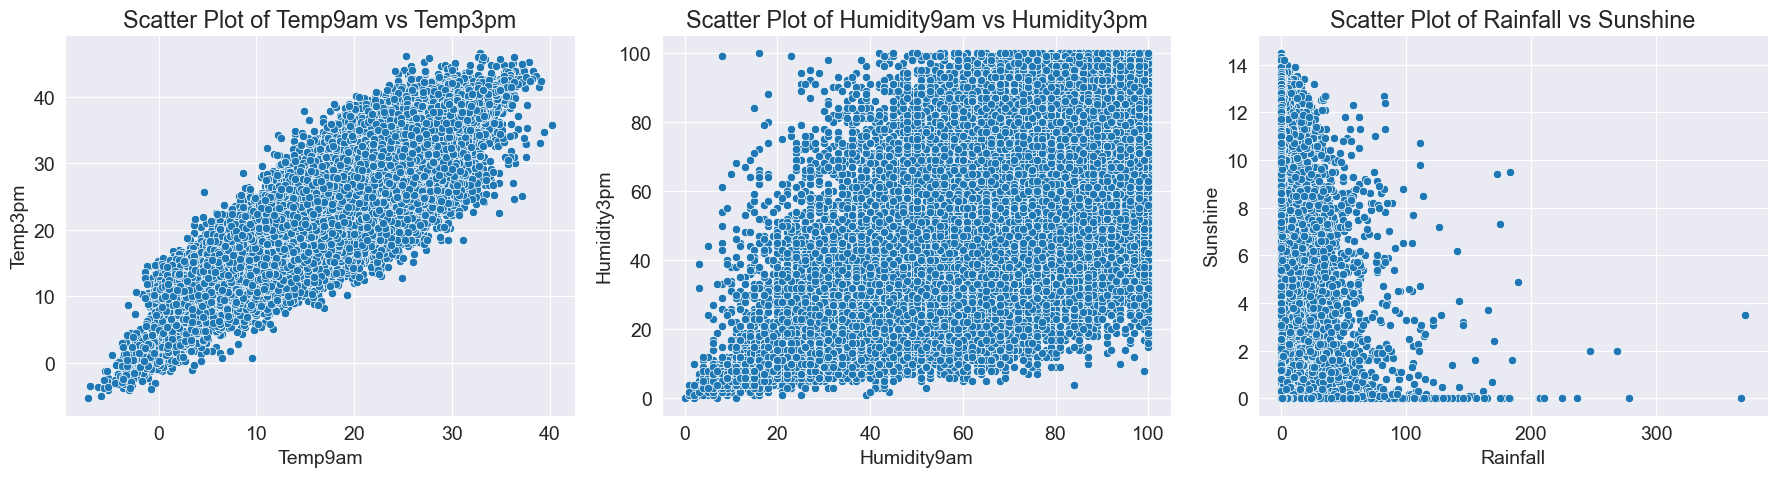

In [22]:
selected_pairs = [('Temp9am', 'Temp3pm'), ('Humidity9am', 'Humidity3pm'), ('Rainfall', 'Sunshine')]
plt.figure(figsize=(18, 5))

for i, pair in enumerate(selected_pairs, 1):
    plt.subplot(1, len(selected_pairs), i)
    sns.scatterplot(x=pair[0], y=pair[1], data=df)
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')

plt.savefig('scatter.png')  # Save the barplot as an image
plt.tight_layout()
plt.show()

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


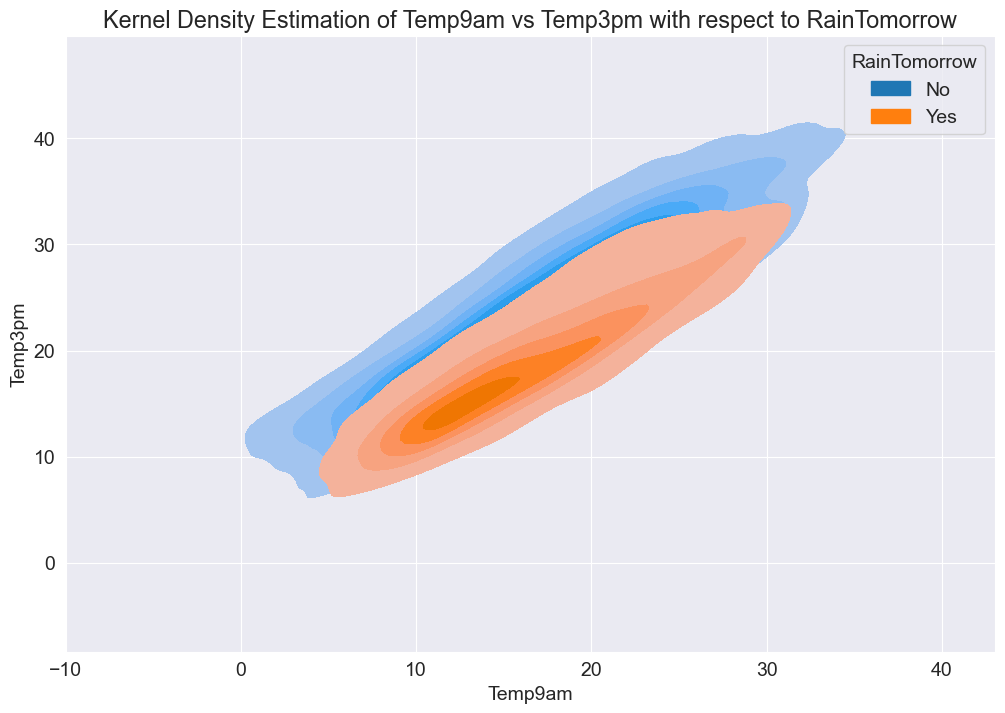

In [25]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x='Temp9am', y='Temp3pm', hue='RainTomorrow', fill=True, data=df, cmap='Blues')
plt.title('Kernel Density Estimation of Temp9am vs Temp3pm with respect to RainTomorrow')
plt.savefig('kde.png')  # Save the barplot as an image
plt.show()

C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Siku\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000015CED5A2020> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

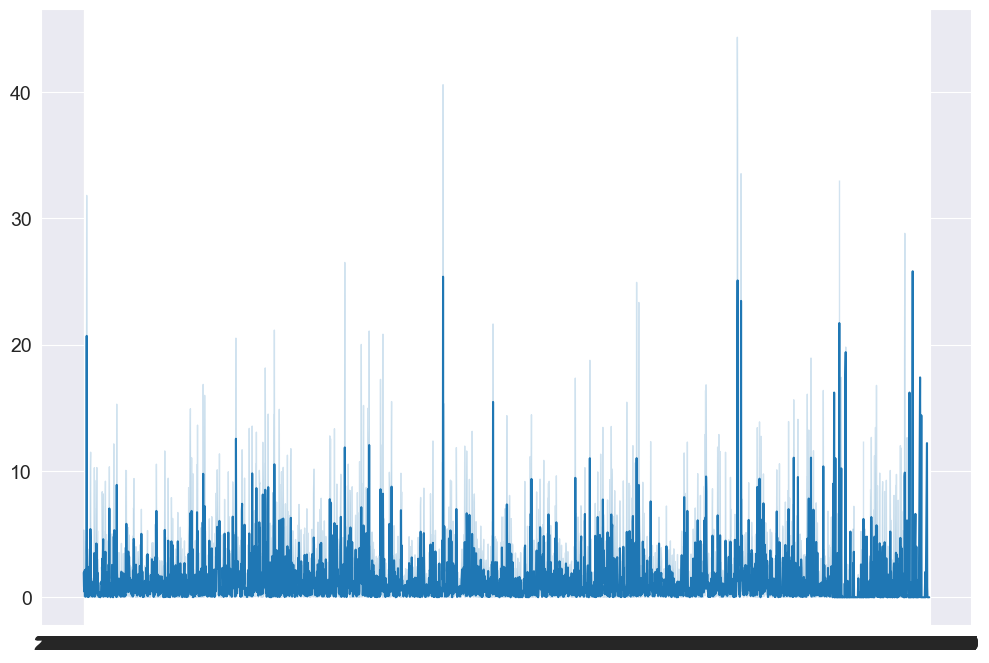

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Rainfall', hue='RainTomorrow', data=df)
plt.title('Rainfall over time with respect to RainTomorrow')
plt.savefig('lineplot.png')  # Save the barplot as an image
plt.show()


In [19]:
from sklearn.impute import SimpleImputer

In [20]:
from sklearn.impute import SimpleImputer

# Assuming numeric_cols is a list of column names containing numeric data
#numeric_cols = [...]  

# Create a SimpleImputer object and fit it to the numeric columns
imputer = SimpleImputer(strategy='mean').fit(df[numeric_cols])

# Transform and replace missing values in the original DataFrame
df[numeric_cols] = imputer.transform(df[numeric_cols])


In [21]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [22]:
df.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,-8.5,-4.8,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,977.1,0.0,0.0,-7.2,-5.4
max,33.9,48.1,371.0,145.0,14.5,135.0,130.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.7


In [23]:
std_df=df_copy

In [24]:
scaler_minmax = MinMaxScaler()
df[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])

# Standard Scaling (Z-score normalization)
scaler_standard = StandardScaler()
std_df[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])


In [25]:
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df['WindGustDir'], df['RainTomorrow'])
chi2, p, _, _ = chi2_contingency(crosstab)
print(f"Chi-squared: {chi2}, p-value: {p}")

Chi-squared: 1519.9012419828084, p-value: 0.0


In [26]:
df[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.189447,-4.533631e-02,-0.210072,-6.364890e-16,-5.897920e-16,0.302234,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,1.568037e+00,0.000000,-0.014053,0.017023
1,-0.753101,2.650431e-01,-0.281650,-6.364890e-16,-5.897920e-16,0.302234,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,2.205160e-16,0.000000,0.032464,0.381985
2,0.110901,3.496920e-01,-0.281650,-6.364890e-16,-5.897920e-16,0.454694,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,2.205160e-16,-1.199232,0.621685,0.221402
3,-0.470337,6.741796e-01,-0.281650,-6.364890e-16,-5.897920e-16,-1.222364,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,2.205160e-16,0.000000,0.172017,0.703151
4,0.833521,1.280830e+00,-0.162353,-6.364890e-16,-5.897920e-16,0.073544,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,1.126652e+00,1.667539,0.125499,1.170302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.475720,2.520446e-02,-0.281650,-6.364890e-16,-5.897920e-16,-0.688755,-0.117754,-0.879093,-0.948349,-1.345267,1.032937,0.756925,2.205160e-16,0.000000,-1.068448,0.104614
145456,-1.350047,2.932594e-01,-0.281650,-6.364890e-16,-5.897920e-16,-1.374824,-0.117754,-1.108541,-0.683163,-1.491815,0.869452,0.576852,2.205160e-16,0.000000,-0.944401,0.411182
145457,-1.067283,5.189899e-01,-0.281650,-6.364890e-16,-5.897920e-16,-0.231375,-0.569169,-1.108541,-0.842274,-1.345267,0.497895,0.231711,2.205160e-16,0.000000,-0.696308,0.644757
145458,-0.690264,5.330980e-01,-0.281650,-6.364890e-16,-5.897920e-16,-0.917445,-0.117754,-1.337990,-0.948349,-1.345267,0.260099,0.186693,-6.388874e-01,-1.199232,-0.293158,0.630159


In [27]:
numeric_columns

NameError: name 'numeric_columns' is not defined

In [30]:
from sklearn.preprocessing import OneHotEncoder


In [31]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[cat_cols])

In [32]:
df[cat_cols]=encoder.transform(df[cat_cols])

ValueError: Columns must be same length as key

In [33]:
set(cat_cols)

{'Date',
 'Location',
 'RainToday',
 'RainTomorrow',
 'WindDir3pm',
 'WindDir9am',
 'WindGustDir'}

In [34]:

# Check the data types of the specified columns
cat_cols_dtypes = df[cat_cols].dtypes

# Display the result
print(cat_cols_dtypes)


Date            object
Location        object
WindGustDir     object
WindDir9am      object
WindDir3pm      object
RainToday       object
RainTomorrow    object
dtype: object


In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column in the DataFrame
for col in cat_cols:
    # Check if the column exists in the DataFrame
    if col in df.columns:
        # Fit and transform the LabelEncoder on the column
        df[col] = label_encoder.fit_transform(df[col])
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

# Display the modified DataFrame
print(df)

        Date  Location   MinTemp       MaxTemp  Rainfall   Evaporation  \
0        396         2  0.189447 -4.533631e-02 -0.210072 -6.364890e-16   
1        397         2 -0.753101  2.650431e-01 -0.281650 -6.364890e-16   
2        398         2  0.110901  3.496920e-01 -0.281650 -6.364890e-16   
3        399         2 -0.470337  6.741796e-01 -0.281650 -6.364890e-16   
4        400         2  0.833521  1.280830e+00 -0.162353 -6.364890e-16   
...      ...       ...       ...           ...       ...           ...   
145455  3431        41 -1.475720  2.520446e-02 -0.281650 -6.364890e-16   
145456  3432        41 -1.350047  2.932594e-01 -0.281650 -6.364890e-16   
145457  3433        41 -1.067283  5.189899e-01 -0.281650 -6.364890e-16   
145458  3434        41 -0.690264  5.330980e-01 -0.281650 -6.364890e-16   
145459  3435        41  0.425083  8.285832e-16 -0.281650 -6.364890e-16   

            Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0      -5.897920e-16           13  

In [36]:
df[cat_cols].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [38]:

df=df[numeric_cols+cat_cols]

In [39]:
X=df.iloc[:, 1:-1]
y=df['RainTomorrow']


In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the sizes of the sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 93094
Validation set size: 23274
Testing set size: 29092


In [41]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,0.189447,-4.533631e-02,-0.210072,-6.364890e-16,-5.897920e-16,0.302234,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,1.568037e+00,0.000000,-0.014053,0.017023,396,2,13,13,14,0,0
1,-0.753101,2.650431e-01,-0.281650,-6.364890e-16,-5.897920e-16,0.302234,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,2.205160e-16,0.000000,0.032464,0.381985,397,2,14,6,15,0,0
2,0.110901,3.496920e-01,-0.281650,-6.364890e-16,-5.897920e-16,0.454694,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,2.205160e-16,-1.199232,0.621685,0.221402,398,2,15,13,15,0,0
3,-0.470337,6.741796e-01,-0.281650,-6.364890e-16,-5.897920e-16,-1.222364,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,2.205160e-16,0.000000,0.172017,0.703151,399,2,4,9,0,0,0
4,0.833521,1.280830e+00,-0.162353,-6.364890e-16,-5.897920e-16,0.073544,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,1.126652e+00,1.667539,0.125499,1.170302,400,2,13,1,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.475720,2.520446e-02,-0.281650,-6.364890e-16,-5.897920e-16,-0.688755,-0.117754,-0.879093,-0.948349,-1.345267,1.032937,0.756925,2.205160e-16,0.000000,-1.068448,0.104614,3431,41,0,9,1,0,0
145456,-1.350047,2.932594e-01,-0.281650,-6.364890e-16,-5.897920e-16,-1.374824,-0.117754,-1.108541,-0.683163,-1.491815,0.869452,0.576852,2.205160e-16,0.000000,-0.944401,0.411182,3432,41,6,9,3,0,0
145457,-1.067283,5.189899e-01,-0.281650,-6.364890e-16,-5.897920e-16,-0.231375,-0.569169,-1.108541,-0.842274,-1.345267,0.497895,0.231711,2.205160e-16,0.000000,-0.696308,0.644757,3433,41,3,9,14,0,0
145458,-0.690264,5.330980e-01,-0.281650,-6.364890e-16,-5.897920e-16,-0.917445,-0.117754,-1.337990,-0.948349,-1.345267,0.260099,0.186693,-6.388874e-01,-1.199232,-0.293158,0.630159,3434,41,9,10,3,0,0


In [42]:
X.shape

(145460, 21)

In [43]:
y.shape

(145460,)

In [44]:
model = DecisionTreeClassifier(random_state=42)

In [45]:
%%time
model.fit(X_train, y_train)

CPU times: total: 1.39 s
Wall time: 1.62 s


DecisionTreeClassifier(random_state=42)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
train_preds = model.predict(X_train)

In [48]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
train_probs = model.predict_proba(X_train)

In [50]:
pd.value_counts(train_preds)

C:\Users\Siku\AppData\Local\Temp\ipykernel_8748\1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


0    70632
1    20366
2     2096
Name: count, dtype: int64

In [53]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [54]:
from sklearn.tree import plot_tree, export_text

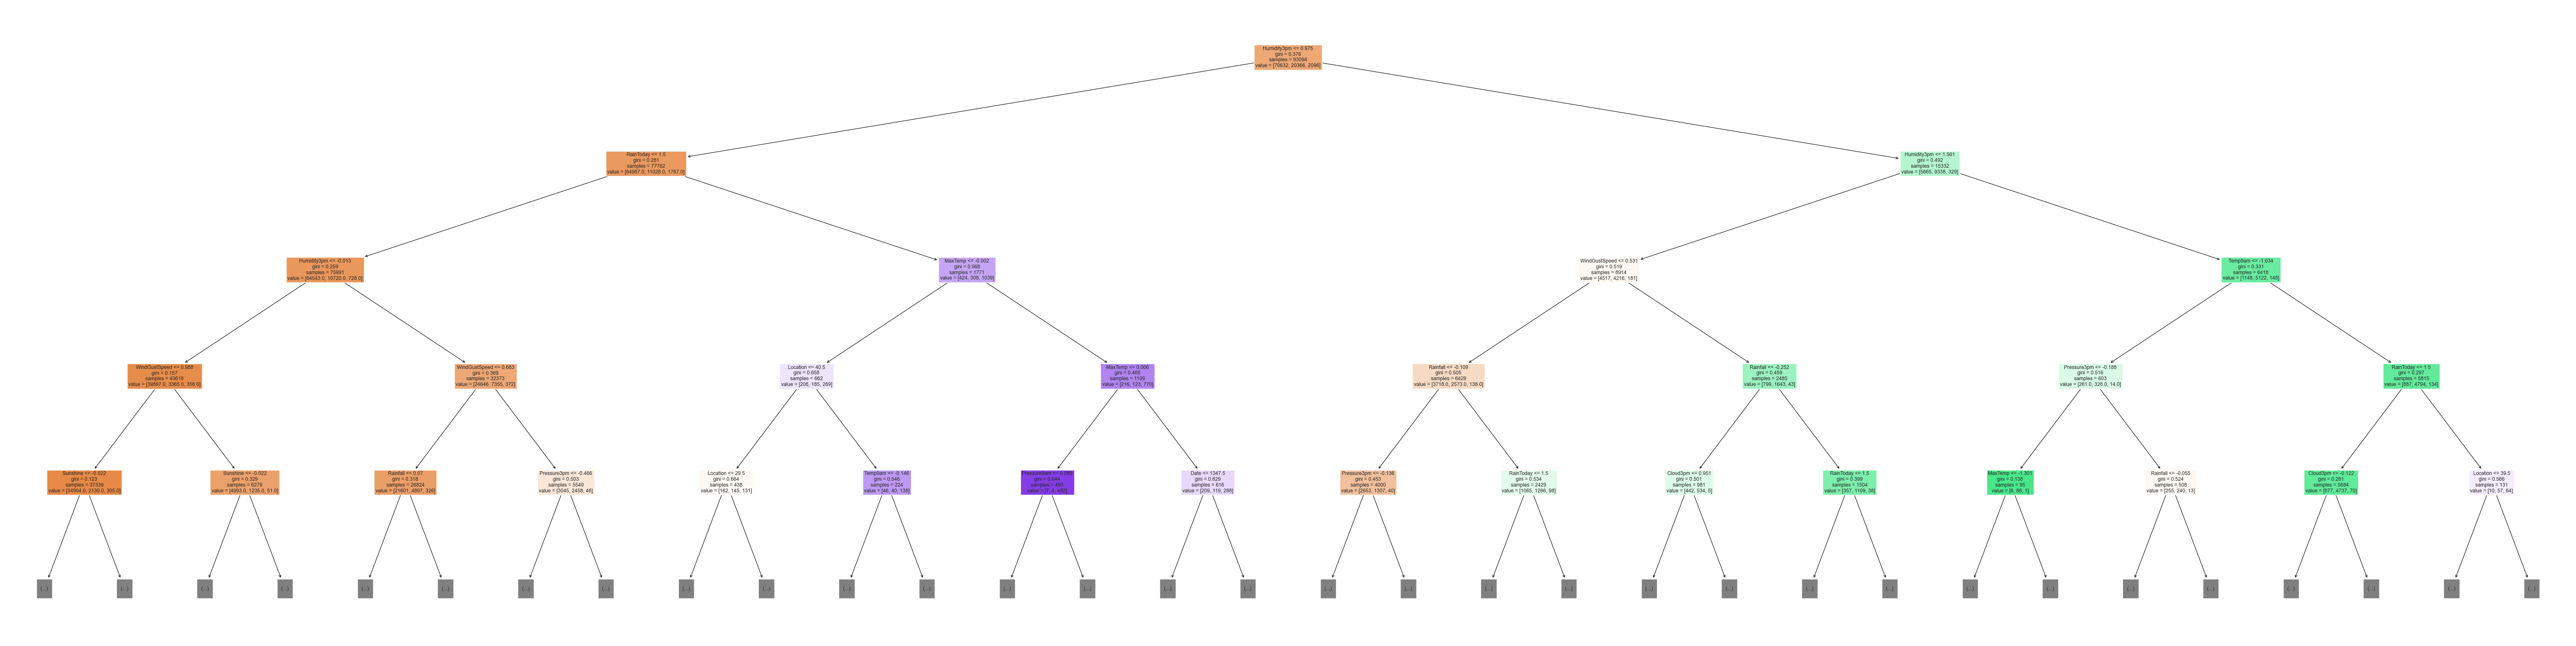

In [55]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=4, filled=True);

In [56]:
model.tree_.max_depth

39

In [57]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.98
|   |--- RainToday <= 1.50
|   |   |--- Humidity3pm <= -0.01
|   |   |   |--- WindGustSpeed <= 0.99
|   |   |   |   |--- Sunshine <= -0.02
|   |   |   |   |   |--- Pressure3pm <= -0.03
|   |   |   |   |   |   |--- Humidity3pm <= -1.22
|   |   |   |   |   |   |   |--- Date <= 3421.00
|   |   |   |   |   |   |   |   |--- Temp3pm <= 2.43
|   |   |   |   |   |   |   |   |   |--- Evaporation <= 0.96
|   |   |   |   |   |   |   |   |   |   |--- Humidity9am <= -2.75
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Humidity9am >  -2.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- Evaporation >  0.96
|   |   |   |   |   |   |   |   |   |   |--- Temp9am <= -0.08
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Temp9am >  -0.08
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |

In [58]:
model.feature_importances_

array([0.04321208, 0.04095335, 0.02270775, 0.03996367, 0.06369508,
       0.03176528, 0.03216304, 0.03998164, 0.24690591, 0.04150317,
       0.06032707, 0.01635094, 0.02082801, 0.04576473, 0.03695125,
       0.05569708, 0.03788883, 0.02903548, 0.02678898, 0.02850993,
       0.03900675])

In [59]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [60]:
importance_df

,feature,importance
8,Humidity3pm,0.246906
4,WindGustSpeed,0.063695
10,Pressure3pm,0.060327
15,Date,0.055697
13,Temp9am,0.045765
0,MaxTemp,0.043212
9,Pressure9am,0.041503
1,Rainfall,0.040953
7,Humidity9am,0.039982
3,Sunshine,0.039964


In [61]:
importa=pd.DataFrame(
    {'feature':X_train.columns,
     'importance':model.feature_importances_}).sort_values('importance', ascending=False)

In [62]:
importa

,feature,importance
8,Humidity3pm,0.246906
4,WindGustSpeed,0.063695
10,Pressure3pm,0.060327
15,Date,0.055697
13,Temp9am,0.045765
0,MaxTemp,0.043212
9,Pressure9am,0.041503
1,Rainfall,0.040953
7,Humidity9am,0.039982
3,Sunshine,0.039964


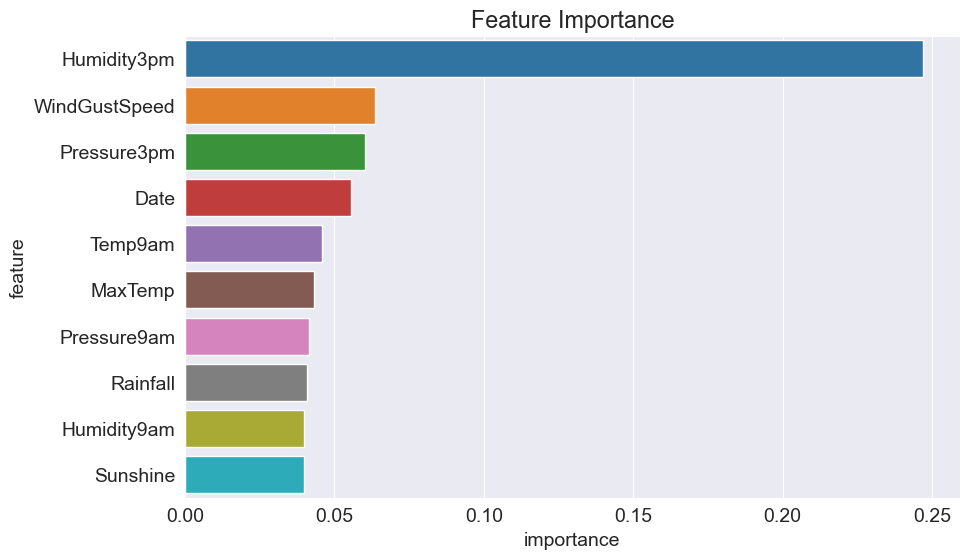

In [63]:
plt.title('Feature Importance')
sns.barplot(data=importa.head(10),y='feature',x='importance');

In [64]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [65]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [66]:
%%time
model.fit(X_train,y_train)

CPU times: total: 172 ms
Wall time: 203 ms


DecisionTreeClassifier(max_depth=3, random_state=42)

In [67]:
model.score(X_train, y_train)

0.8170773626656928

In [68]:
    model.score(X_val, y_val)

0.8156741428203145

In [69]:
model.classes_

array([0, 1, 2])

TypeError: can only concatenate str (not "numpy.int32") to str

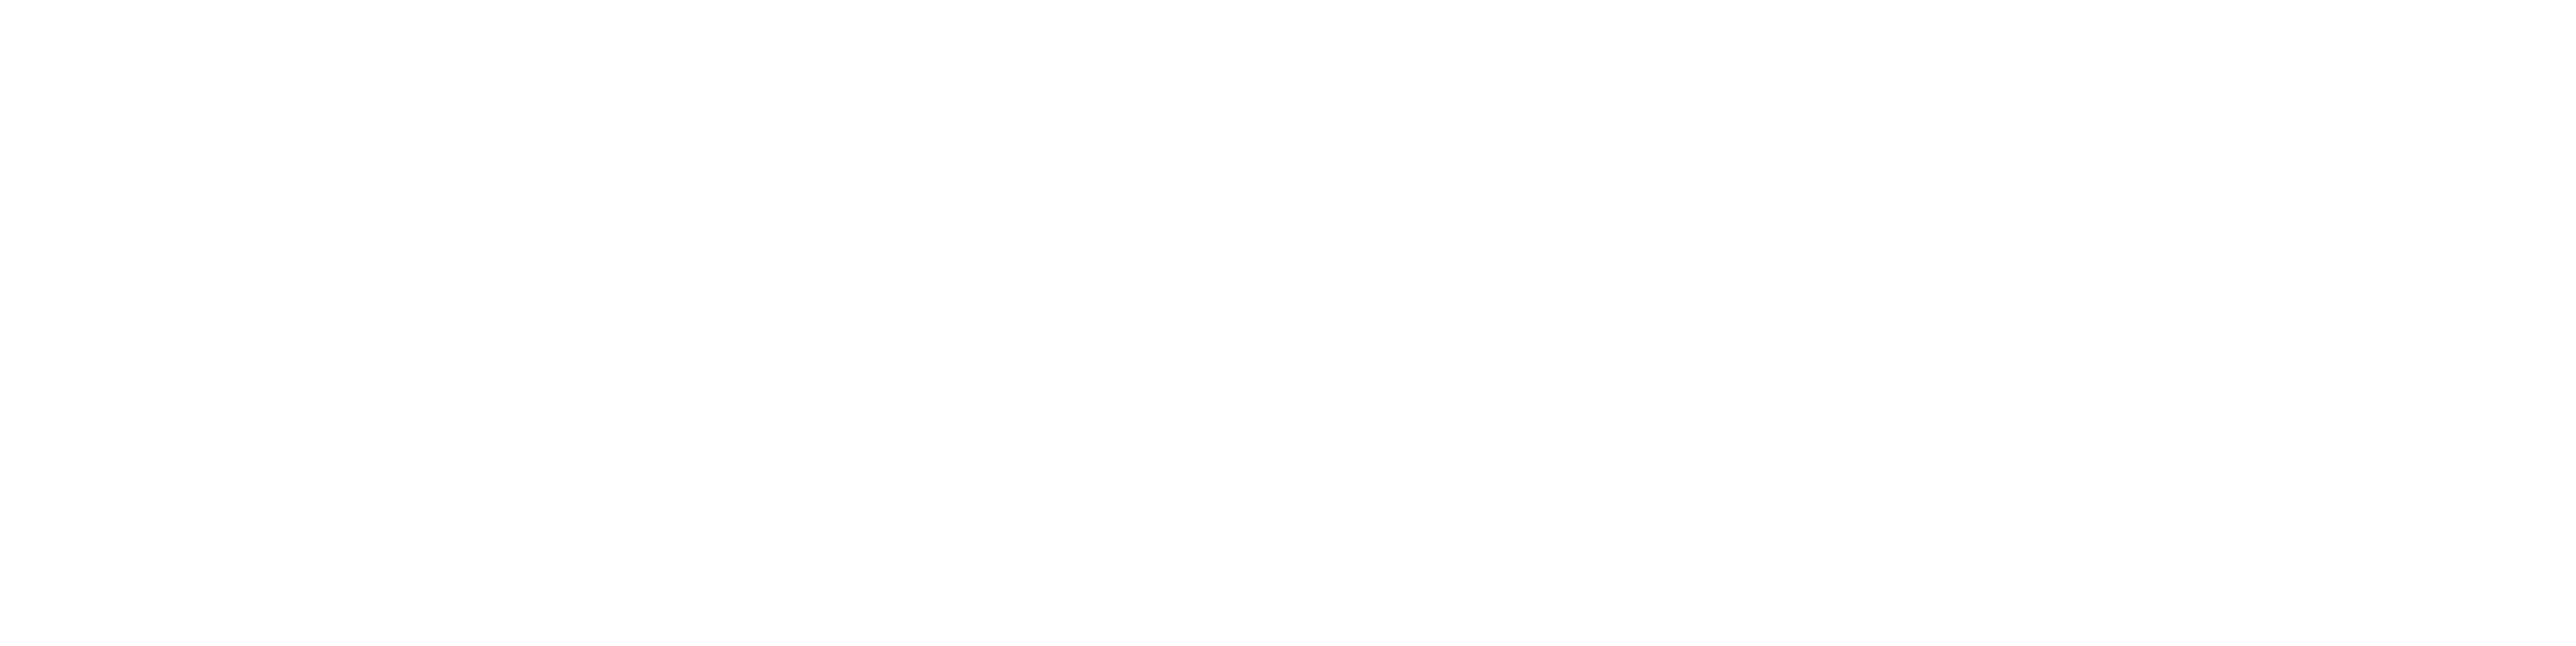

In [70]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [71]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.98
|   |--- RainToday <= 1.50
|   |   |--- Humidity3pm <= -0.01
|   |   |   |--- class: 0
|   |   |--- Humidity3pm >  -0.01
|   |   |   |--- class: 0
|   |--- RainToday >  1.50
|   |   |--- MaxTemp <= -0.00
|   |   |   |--- class: 2
|   |   |--- MaxTemp >  -0.00
|   |   |   |--- class: 2
|--- Humidity3pm >  0.98
|   |--- Humidity3pm <= 1.56
|   |   |--- WindGustSpeed <= 0.53
|   |   |   |--- class: 0
|   |   |--- WindGustSpeed >  0.53
|   |   |   |--- class: 1
|   |--- Humidity3pm >  1.56
|   |   |--- Temp9am <= -1.63
|   |   |   |--- class: 1
|   |   |--- Temp9am >  -1.63
|   |   |   |--- class: 1



In [72]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    train_acc = 1 - model.score(X_train, y_train)
    val_acc = 1 - model.score(X_val, y_val)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [73]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 30)])

CPU times: total: 18.9 s
Wall time: 32.2 s


In [82]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.201828,0.203747
1,2,0.191989,0.193134
2,3,0.182923,0.184326
3,4,0.180194,0.182349
4,5,0.172675,0.178311
5,6,0.167981,0.172768
6,7,0.164457,0.171221
7,8,0.160580,0.170233
8,9,0.154758,0.169374
9,10,0.147883,0.171780


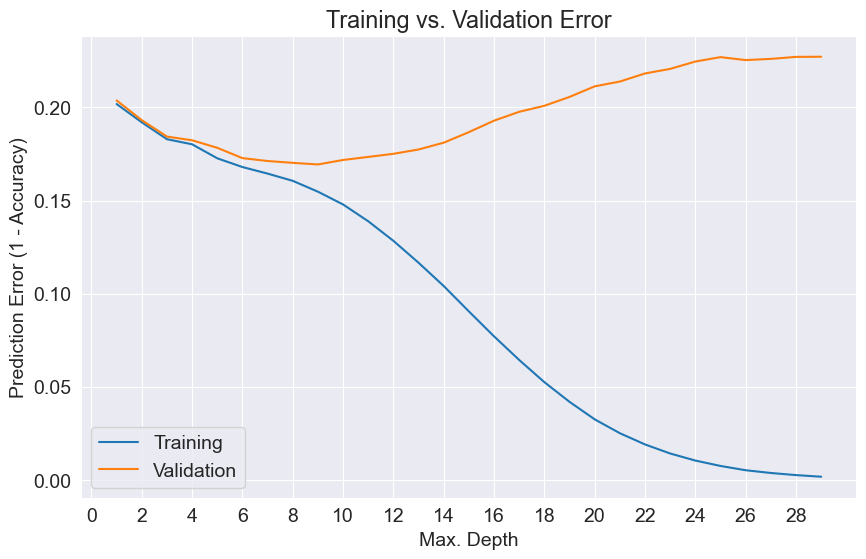

In [74]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,30, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [75]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, y_train)
model.score(X_val, y_val)

0.8287788949041849

In [76]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [77]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [78]:
model.score(X_train, y_train)

0.8378090961823533

In [79]:
model.tree_.max_depth

12

In [80]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.98
|   |--- RainToday <= 1.50
|   |   |--- Humidity3pm <= -0.01
|   |   |   |--- WindGustSpeed <= 0.99
|   |   |   |   |--- Sunshine <= -0.02
|   |   |   |   |   |--- Pressure3pm <= -0.03
|   |   |   |   |   |   |--- Humidity3pm <= -1.22
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Humidity3pm >  -1.22
|   |   |   |   |   |   |   |--- WindGustSpeed <= -0.31
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- WindGustSpeed >  -0.31
|   |   |   |   |   |   |   |   |--- WindDir9am <= 5.50
|   |   |   |   |   |   |   |   |   |--- WindGustDir <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- WindGustDir >  2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- WindDir9am >  5.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Pressure3pm >  -0.03
|   |   |   |   |   |   |--- class: 0
|   |   |   | 

In [81]:
%%timeit
dt_model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'max_leaf_nodes': [None, 5, 10, 20]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_max_depth = grid_search.best_params_['max_depth']
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']


6.43 s ± 323 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [82]:
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],  # None means no maximum depth
    'max_leaf_nodes': [None, 5, 10, 20, 50, 100, 200]  # None means unlimited leaf nodes
}

In [83]:
param_grid1 = {
    'max_depth': [3, 5, 7, 10],
    'max_leaf_nodes': [None, 5, 10, 20]
}


In [84]:
%%time
from sklearn.model_selection import GridSearchCV
dt_model=DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)


CPU times: total: 2.27 s
Wall time: 18.8 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, 15, None],
                         'max_leaf_nodes': [None, 5, 10, 20, 50, 100, 200]})

In [85]:

# Get the best hyperparameters
best_max_depth = grid_search.best_params_['max_depth']
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']

In [86]:

# Train the model with the best hyperparameters
best_model = DecisionTreeClassifier(max_depth=best_max_depth, max_leaf_nodes=best_max_leaf_nodes)
best_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=10, max_leaf_nodes=200)

In [87]:

# Evaluate on the validation set
y_val_pred = best_model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)

In [88]:

print(f"Best max_depth: {best_max_depth}")
print(f"Best max_leaf_nodes: {best_max_leaf_nodes}")
print(f"Validation Accuracy: {validation_accuracy}")

Best max_depth: 10
Best max_leaf_nodes: 200
Validation Accuracy: 0.8304975509151843


In [89]:
param_grid3 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [None, 42, 123],
    'max_leaf_nodes': [None, 5, 10, 20, 50, 100],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0, 0.1, 0.2],
    'monotonic_cst': [None]
}


In [ ]:
%%time
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid3, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)


In [ ]:

# Get the best hyperparameters
best_max_depth = grid_search.best_params_['max_depth']
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']

In [ ]:

# Train the model with the best hyperparameters
best_model = DecisionTreeClassifier(max_depth=best_max_depth, max_leaf_nodes=best_max_leaf_nodes)
best_model.fit(X_train, y_train)



In [ ]:
!pip install cuml 
import pickle 

from sklearn.model_selection import GridSearchCV

In [ ]:
from cuml.model_selection import GridSearchCV
from cuml.metrics import accuracy_score

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid3, cv=10, n_jobs=-1)



In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)


In [ ]:

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

In [ ]:
y_pred = grid_search.predict(X_test)



In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy
print("Accuracy:", accuracy)

In [ ]:
# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Dump the best model to a file
with open('best_decision_tree_model.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy
print("Accuracy:", accuracy)